<a href="https://colab.research.google.com/github/saurav714/Building-a-simple-Generative-Adversarial-Network-GAN-using-TensorFlow/blob/main/Building_a_simple_Generative_Adversarial_Network_(GAN)_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def get_y(x):
    return 10 + x*x


def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

In [2]:
def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

In [5]:
def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [6]:
X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

NameError: name 'tf' is not defined

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [8]:
# Load MNIST dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize images to [-1, 1]
train_images = train_images.reshape(train_images.shape[0], 28 * 28).astype('float32')
train_images = (train_images - 127.5) / 127.5

# Batch and shuffle the data
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(100,), use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(784, use_bias=False, activation='tanh'))
    return model

generator = make_generator_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, input_shape=(784,)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

discriminator = make_discriminator_model()

In [11]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [12]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [13]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
        print(f'Epoch {epoch + 1}, Gen Loss: {g_loss}, Disc Loss: {d_loss}')
        generate_and_save_images(generator, epoch + 1, seed)

In [14]:
seed = tf.random.normal([16, 100])

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :].numpy().reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

Epoch 1, Gen Loss: 3.4022984504699707, Disc Loss: 0.06563541293144226


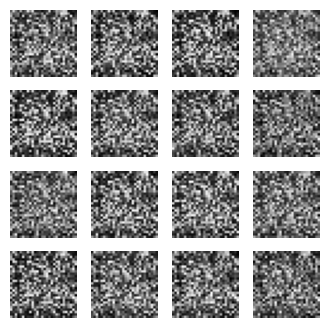

Epoch 2, Gen Loss: 3.2995080947875977, Disc Loss: 0.10634133219718933


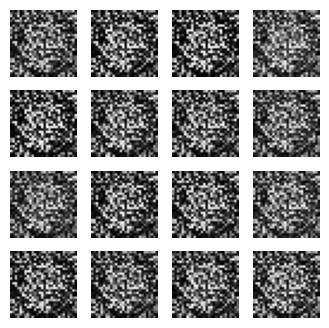

Epoch 3, Gen Loss: 3.2019824981689453, Disc Loss: 0.1546880006790161


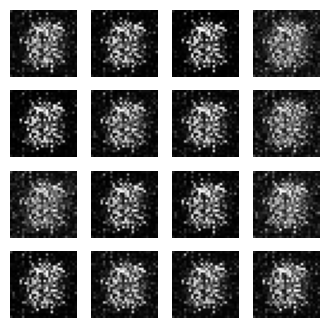

Epoch 4, Gen Loss: 4.688612461090088, Disc Loss: 0.07424482703208923


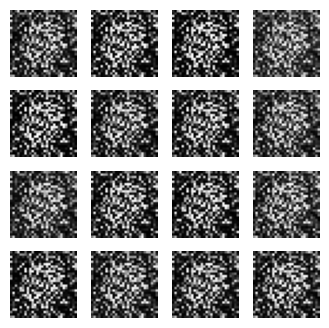

Epoch 5, Gen Loss: 4.414522647857666, Disc Loss: 0.0873185396194458


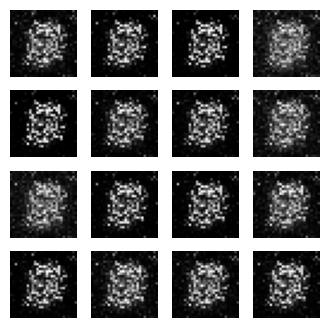

Epoch 6, Gen Loss: 3.9646387100219727, Disc Loss: 0.15352670848369598


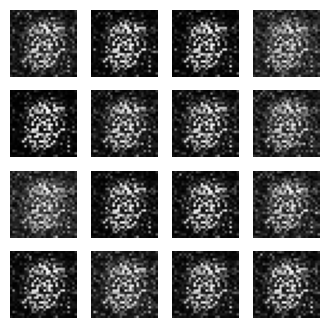

Epoch 7, Gen Loss: 4.045341491699219, Disc Loss: 0.09949103742837906


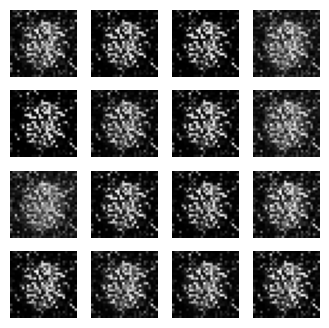

Epoch 8, Gen Loss: 3.5781807899475098, Disc Loss: 0.30923885107040405


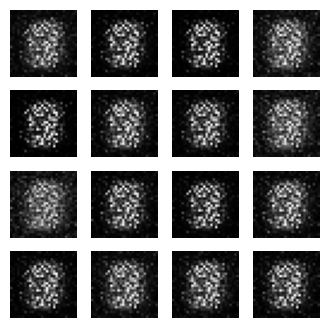

Epoch 9, Gen Loss: 3.8631300926208496, Disc Loss: 0.1419522613286972


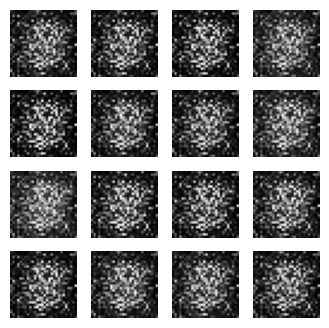

Epoch 10, Gen Loss: 3.4244418144226074, Disc Loss: 0.1505149006843567


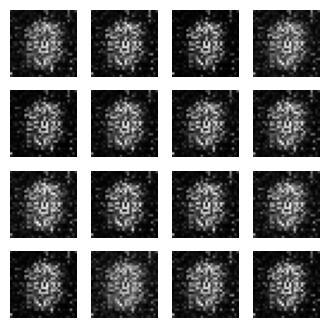

Epoch 11, Gen Loss: 1.9539768695831299, Disc Loss: 0.2731659412384033


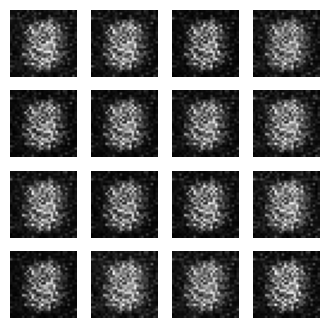

Epoch 12, Gen Loss: 2.494973659515381, Disc Loss: 0.2689145803451538


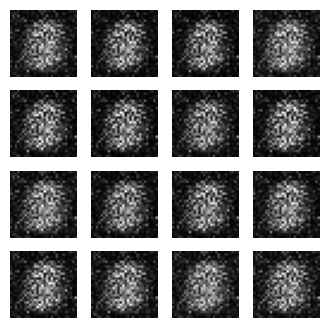

Epoch 13, Gen Loss: 3.131107807159424, Disc Loss: 0.13734248280525208


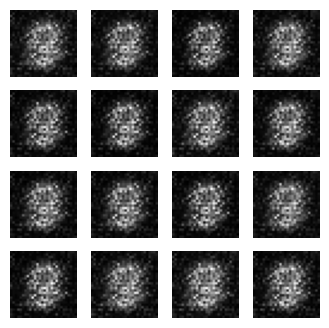

Epoch 14, Gen Loss: 2.652820110321045, Disc Loss: 0.12792298197746277


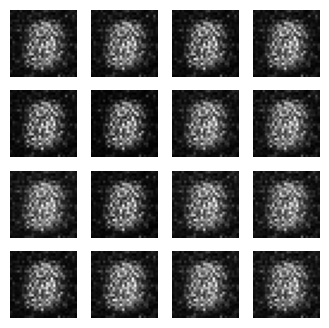

Epoch 15, Gen Loss: 2.6902058124542236, Disc Loss: 0.25424835085868835


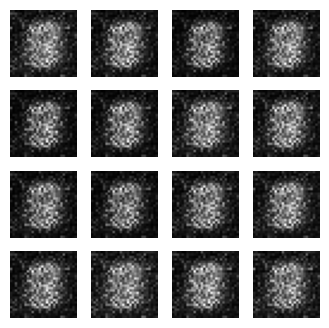

Epoch 16, Gen Loss: 2.9309446811676025, Disc Loss: 0.29494526982307434


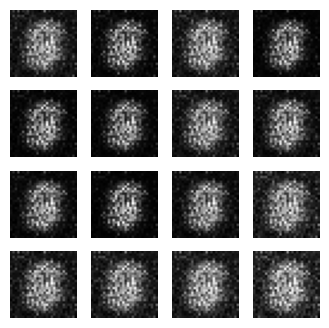

In [ ]:
EPOCHS = 50
train(train_dataset, EPOCHS)